# Creating a Baseline Classifier Model

Predicting the win/loss margin of a game based on Brunson's performance stats

In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./cleaned_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 72 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          467 non-null    object 
 1   Team          467 non-null    object 
 2   Home/Away     467 non-null    object 
 3   Opp           467 non-null    object 
 4   MP_G          467 non-null    int64  
 5   FG_G          467 non-null    int64  
 6   FGA_G         467 non-null    int64  
 7   FG%_G         467 non-null    float64
 8   3P_G          467 non-null    int64  
 9   3PA_G         467 non-null    int64  
 10  3P%_G         467 non-null    float64
 11  FT_G          467 non-null    int64  
 12  FTA_G         467 non-null    int64  
 13  FT%_G         467 non-null    float64
 14  ORB_G         467 non-null    int64  
 15  DRB_G         467 non-null    int64  
 16  TRB_G         467 non-null    int64  
 17  AST_G         467 non-null    int64  
 18  STL_G         467 non-null    

In [125]:
df.columns

Index(['Date', 'Team', 'Home/Away', 'Opp', 'MP_G', 'FG_G', 'FGA_G', 'FG%_G',
       '3P_G', '3PA_G', '3P%_G', 'FT_G', 'FTA_G', 'FT%_G', 'ORB_G', 'DRB_G',
       'TRB_G', 'AST_G', 'STL_G', 'BLK_G', 'TOV_G', 'PF_G', 'PTS_G', 'GmSc',
       'Plus/Minus_G', 'W/L_Margin', 'Season', 'Ttl_MP_Sn', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'ValORP',
       'Pos', 'Avg_MP_Sn', 'FG_Sn', 'FGA_Sn', 'FG%_Sn', '3P_Sn', '3PA_Sn',
       '3P%_Sn', '2P_Sn', '2PA_Sn', '2P%_Sn', 'eFG%_Sn', 'FT_Sn', 'FTA_Sn',
       'FT%_Sn', 'ORB_Sn', 'DRB_Sn', 'TRB_Sn', 'AST_Sn', 'STL_Sn', 'BLK_Sn',
       'TOV_Sn', 'PF_Sn', 'PTS_Sn'],
      dtype='object')

In [126]:
#Date isn't important to the model so we can drop it
df.drop(columns=['Date'], inplace=True)

In [127]:
# Drop the position column
df.drop(columns=['Pos'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 70 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Team          467 non-null    object 
 1   Home/Away     467 non-null    object 
 2   Opp           467 non-null    object 
 3   MP_G          467 non-null    int64  
 4   FG_G          467 non-null    int64  
 5   FGA_G         467 non-null    int64  
 6   FG%_G         467 non-null    float64
 7   3P_G          467 non-null    int64  
 8   3PA_G         467 non-null    int64  
 9   3P%_G         467 non-null    float64
 10  FT_G          467 non-null    int64  
 11  FTA_G         467 non-null    int64  
 12  FT%_G         467 non-null    float64
 13  ORB_G         467 non-null    int64  
 14  DRB_G         467 non-null    int64  
 15  TRB_G         467 non-null    int64  
 16  AST_G         467 non-null    int64  
 17  STL_G         467 non-null    int64  
 18  BLK_G         467 non-null    

In [128]:
df

,Team,Home/Away,Opp,MP_G,FG_G,FGA_G,FG%_G,3P_G,3PA_G,3P%_G,...,FT%_Sn,ORB_Sn,DRB_Sn,TRB_Sn,AST_Sn,STL_Sn,BLK_Sn,TOV_Sn,PF_Sn,PTS_Sn
0,DAL,Away,PHO,19,1,3,0.333,1,3,0.333,...,0.725,0.3,2.0,2.3,3.2,0.5,0.1,1.2,1.7,9.3
1,DAL,Home,MIN,20,3,7,0.429,1,4,0.250,...,0.725,0.3,2.0,2.3,3.2,0.5,0.1,1.2,1.7,9.3
2,DAL,Home,CHI,14,2,7,0.286,2,4,0.500,...,0.725,0.3,2.0,2.3,3.2,0.5,0.1,1.2,1.7,9.3
3,DAL,Away,ATL,18,3,9,0.333,0,3,0.000,...,0.725,0.3,2.0,2.3,3.2,0.5,0.1,1.2,1.7,9.3
4,DAL,Away,TOR,29,3,11,0.273,2,4,0.500,...,0.725,0.3,2.0,2.3,3.2,0.5,0.1,1.2,1.7,9.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,NYK,Away,MIL,39,16,32,0.500,2,6,0.333,...,0.847,0.6,3.1,3.6,6.7,0.9,0.2,2.4,1.9,28.7
463,NYK,Away,CHI,42,13,24,0.542,7,12,0.583,...,0.847,0.6,3.1,3.6,6.7,0.9,0.2,2.4,1.9,28.7
464,NYK,Away,BOS,30,15,23,0.652,6,11,0.545,...,0.847,0.6,3.1,3.6,6.7,0.9,0.2,2.4,1.9,28.7
465,NYK,Home,BRK,36,10,25,0.400,3,7,0.429,...,0.847,0.6,3.1,3.6,6.7,0.9,0.2,2.4,1.9,28.7


In [129]:
df.to_csv('cleaned_data.csv', index=False)

## Feature Engineering


Extract categorical variables for feature engineering

In [130]:
categorical_columns = df[['Team', 'Home/Away', 'Opp', 'Season']]
categorical_columns

,Team,Home/Away,Opp,Season
0,DAL,Away,PHO,2018-19
1,DAL,Home,MIN,2018-19
2,DAL,Home,CHI,2018-19
3,DAL,Away,ATL,2018-19
4,DAL,Away,TOR,2018-19
...,...,...,...,...
462,NYK,Away,MIL,2023-24
463,NYK,Away,CHI,2023-24
464,NYK,Away,BOS,2023-24
465,NYK,Home,BRK,2023-24


In [141]:
 # Get numerical and categorical features, excluding the target

numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_features = [col for col in numerical_features if col not in ['W/L_Margin']]

categorical_features = categorical_columns.columns.tolist()

print("Numerical features:", numerical_features)
print("Categorical features:", categorical_features)

Numerical features: ['MP_G', 'FG_G', 'FGA_G', 'FG%_G', '3P_G', '3PA_G', '3P%_G', 'FT_G', 'FTA_G', 'FT%_G', 'ORB_G', 'DRB_G', 'TRB_G', 'AST_G', 'STL_G', 'BLK_G', 'TOV_G', 'PF_G', 'PTS_G', 'GmSc', 'Plus/Minus_G', 'Ttl_MP_Sn', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'ValORP', 'Avg_MP_Sn', 'FG_Sn', 'FGA_Sn', 'FG%_Sn', '3P_Sn', '3PA_Sn', '3P%_Sn', '2P_Sn', '2PA_Sn', '2P%_Sn', 'eFG%_Sn', 'FT_Sn', 'FTA_Sn', 'FT%_Sn', 'ORB_Sn', 'DRB_Sn', 'TRB_Sn', 'AST_Sn', 'STL_Sn', 'BLK_Sn', 'TOV_Sn', 'PF_Sn', 'PTS_Sn']
Categorical features: ['Team', 'Home/Away', 'Opp', 'Season']


In [142]:
df['W/L_Margin'].min(), df['W/L_Margin'].max()


(-39, 51)

## Train-Test Split

In [143]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Separate features and target
X = df.drop(columns=['W/L_Margin'])
y = df['W/L_Margin']


# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [145]:
print(X_train.shape)
print(X_test.shape)


(350, 69)
(117, 69)


## Building the Pipeline

In [146]:
# one hot encoding the categorical features
# using min max scaler to take care of negative and positive values in the dataset
preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(sparse=False), categorical_features),
        ('scaler', MinMaxScaler(feature_range=(-1,1)), numerical_features)
    ], 
    remainder='passthrough'
)

In [147]:
# Building the Model using Linear Regression and KBest Feature Selection

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression, chi2

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest()),
    ('regressor', LinearRegression())
    ])

## Grid Search Cross Validation

In [148]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'feature_selection__k': [5, 10, 15, 20],
    'feature_selection__score_func': [f_regression, chi2],
    'regressor__fit_intercept': [True, False],
    'regressor__positive': [True, False]
}

grid_search = GridSearchCV(pipeline,
                           param_grid, 
                           cv=5, 
                           scoring='r2')

## Fit the pipeline

In [149]:
grid_search.fit(X_train, y_train)



/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/pr

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(sparse=False),
                                                                         ['Team',
                                                                          'Home/Away',
                                                                          'Opp',
                                                                          'Season']),
                                                                        ('scaler',
                                                                         MinMaxScaler(feature_range=(-1,
                                                                                                     1)),
                                                                         ['MP_G',
                                                                          'FG_G',
                                                                          'FGA_G',
                                                                          'FG%_G',
                                                                          '3P_G',
                                                                          '3PA_G',
                                                                          '3P%_G',
                                                                          'FT_G',
                                                                          'FTA_G',
                                                                          'FT%_G',
                                                                          'ORB_G',
                                                                          'DRB_G',
                                                                          'TRB_G',
                                                                          'AST_G',
                                                                          'STL_G',...
                                                                          '3PAr',
                                                                          'FTr',
                                                                          'ORB%',
                                                                          'DRB%',
                                                                          'TRB%',
                                                                          'AST%', ...])])),
                                       ('feature_selection', SelectKBest()),
                                       ('regressor', LinearRegression())]),
             param_grid={'feature_selection__k': [5, 10, 15, 20],
                         'feature_selection__score_func': [<function f_regression at 0x123a35da0>,
                                                           <function chi2 at 0x123a35c60>],
                         'regressor__fit_intercept': [True, False],
                         'regressor__positive': [True, False]},
             scoring='r2')

## Evaluating the Baseline Model

In [150]:
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters found: {'feature_selection__k': 15, 'feature_selection__score_func': <function f_regression at 0x123a35da0>, 'regressor__fit_intercept': False, 'regressor__positive': False}
Best cross-validation score: 0.03593878105347259


This model does not explain the data well at all.

In [151]:
grid_search.cv_results_

{'mean_fit_time': array([0.07055182, 0.17009068, 0.01708918, 0.01277552, 0.01133075,
        0.01138725, 0.01127453, 0.01084533, 0.01422458, 0.01347556,
        0.01357484, 0.01338625, 0.01538286, 0.01109281, 0.01097994,
        0.01167374, 0.01360207, 0.01378856, 0.01300578, 0.01316938,
        0.01172714, 0.01145144, 0.01107454, 0.01232376, 0.01333265,
        0.01496739, 0.01299028, 0.01435041, 0.0113409 , 0.01121521,
        0.0117466 , 0.01133194]),
 'std_fit_time': array([0.03099345, 0.08082444, 0.00707942, 0.00051637, 0.00088756,
        0.00127837, 0.00082407, 0.00071916, 0.00083557, 0.0006099 ,
        0.00123297, 0.00051586, 0.00521321, 0.00072754, 0.00060915,
        0.00139806, 0.00087839, 0.00121454, 0.00062868, 0.00055221,
        0.00158583, 0.00102946, 0.00098352, 0.0014053 , 0.00112636,
        0.00244173, 0.00043541, 0.00231132, 0.0009062 , 0.00079669,
        0.00067188, 0.00095385]),
 'mean_score_time': array([0.02175894, 0.01047945, 0.00638871, 0.0061491 , 0.      

In [152]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_model = grid_search.best_estimator_


In [153]:
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(sparse=False),
                                                  ['Team', 'Home/Away', 'Opp',
                                                   'Season']),
                                                 ('scaler',
                                                  MinMaxScaler(feature_range=(-1,
                                                                              1)),
                                                  ['MP_G', 'FG_G', 'FGA_G',
                                                   'FG%_G', '3P_G', '3PA_G',
                                                   '3P%_G', 'FT_G', 'FTA_G',
                                                   'FT%_G', 'ORB_G', 'DRB_G',
                                                   'TRB_G', 'AST_G', 'STL_G',
                                                   'BLK_G', 'TOV_G', 'PF_G',
                                                   'PTS_G', 'GmSc',
                                                   'Plus/Minus_G', 'Ttl_MP_Sn',
                                                   'PER', 'TS%', '3PAr', 'FTr',
                                                   'ORB%', 'DRB%', 'TRB%',
                                                   'AST%', ...])])),
                ('feature_selection',
                 SelectKBest(k=15,
                             score_func=<function f_regression at 0x123a35da0>)),
                ('regressor', LinearRegression(fit_intercept=False))])

# Predict on the best model

In [154]:
y_pred = best_model.predict(X_test)

In [155]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, f1_score


# R2 Score
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


R2 Score: -0.14771338288503788
Mean Squared Error: 206.1839550250094


# Interpreting the Model

In [156]:
feature_importance = best_model.named_steps['regressor'].coef_
feature_importance


array([ -5.29928472,  10.56454207,  11.04283929,  11.0215586 ,
        -7.55689615,  -8.78336531,   8.31864823,  23.96745774,
         7.43458846,  23.55686988,   8.7856051 , -10.661372  ,
        -8.66894038,  12.72501077,  -4.25819822])

In [157]:
feature_selector = grid_search.best_estimator_.named_steps['feature_selection']

In [158]:
temp_preprocessor = preprocessor.fit(X_train)

# Get feature names
feature_names = []

# Add one-hot encoded feature names
ohe = temp_preprocessor.named_transformers_['ohe']
categorical_feature_names = ohe.get_feature_names_out(categorical_features)
feature_names.extend(categorical_feature_names)

# Add numerical feature names
feature_names.extend(numerical_features)

/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [159]:
feature_names

['Team_DAL',
 'Team_NYK',
 'Home/Away_Away',
 'Home/Away_Home',
 'Opp_ATL',
 'Opp_BOS',
 'Opp_BRK',
 'Opp_CHI',
 'Opp_CHO',
 'Opp_CLE',
 'Opp_DAL',
 'Opp_DEN',
 'Opp_DET',
 'Opp_GSW',
 'Opp_HOU',
 'Opp_IND',
 'Opp_LAC',
 'Opp_LAL',
 'Opp_MEM',
 'Opp_MIA',
 'Opp_MIL',
 'Opp_MIN',
 'Opp_NOP',
 'Opp_NYK',
 'Opp_OKC',
 'Opp_ORL',
 'Opp_PHI',
 'Opp_PHO',
 'Opp_POR',
 'Opp_SAC',
 'Opp_SAS',
 'Opp_TOR',
 'Opp_UTA',
 'Opp_WAS',
 'Season_2018-19',
 'Season_2019-20',
 'Season_2020-21',
 'Season_2021-22',
 'Season_2022-23',
 'Season_2023-24',
 'MP_G',
 'FG_G',
 'FGA_G',
 'FG%_G',
 '3P_G',
 '3PA_G',
 '3P%_G',
 'FT_G',
 'FTA_G',
 'FT%_G',
 'ORB_G',
 'DRB_G',
 'TRB_G',
 'AST_G',
 'STL_G',
 'BLK_G',
 'TOV_G',
 'PF_G',
 'PTS_G',
 'GmSc',
 'Plus/Minus_G',
 'Ttl_MP_Sn',
 'PER',
 'TS%',
 '3PAr',
 'FTr',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'USG%',
 'OWS',
 'DWS',
 'WS',
 'WS/48',
 'OBPM',
 'DBPM',
 'BPM',
 'ValORP',
 'Avg_MP_Sn',
 'FG_Sn',
 'FGA_Sn',
 'FG%_Sn',
 '3P_Sn',
 '3PA_

In [160]:
# Get the mask of selected features
selected_mask = feature_selector.get_support()

# Get the scores_ attribute 
feature_scores = feature_selector.scores_

# Get the pvalues_ attribute 
feature_pvalues = feature_selector.pvalues_

# Create a DataFrame to see which features were selected
feature_selection_df = pd.DataFrame({
    'Feature': feature_names,
    'Selected': selected_mask,
    'Score': feature_scores,
    'P-Value': feature_pvalues
})

print("Selected Features:")
print(feature_selection_df[feature_selection_df['Selected']].sort_values('Score', ascending=False))

Selected Features:
           Feature  Selected      Score       P-Value
60    Plus/Minus_G      True  25.655153  6.635448e-07
95          FT%_Sn      True   8.894196  3.062500e-03
34  Season_2018-19      True   7.605332  6.126764e-03
12         Opp_DET      True   6.695510  1.007037e-02
8          Opp_CHO      True   6.302284  1.251123e-02
66            ORB%      True   5.220619  2.292188e-02
69            AST%      True   5.044707  2.532815e-02
9          Opp_CLE      True   5.007995  2.586274e-02
96          ORB_Sn      True   4.626727  3.216561e-02
28         Opp_POR      True   4.488040  3.484100e-02
20         Opp_MIL      True   3.933401  4.812179e-02
23         Opp_NYK      True   3.487755  6.266478e-02
62             PER      True   3.143234  7.711718e-02
77           WS/48      True   2.907472  8.906242e-02
5          Opp_BOS      True   2.899101  8.952188e-02


/var/folders/rj/3yvmqxnj3d17zpgh8wpywxvr0000gn/T/ipykernel_1381/46500917.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


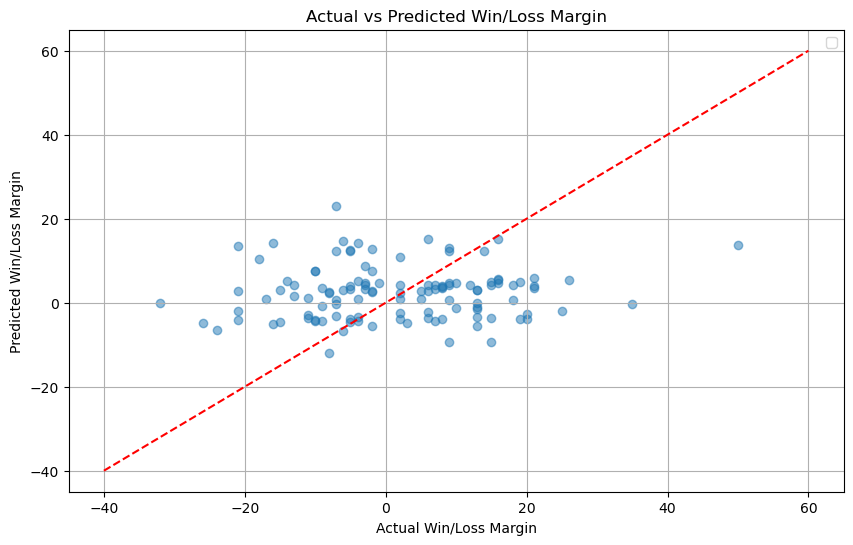

In [164]:
# Visualizing  actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([-40, 60], [-40, 60], 'r--') 
plt.xlabel('Actual Win/Loss Margin')
plt.ylabel('Predicted Win/Loss Margin')
plt.title('Actual vs Predicted Win/Loss Margin')
plt.legend()
plt.grid(True)

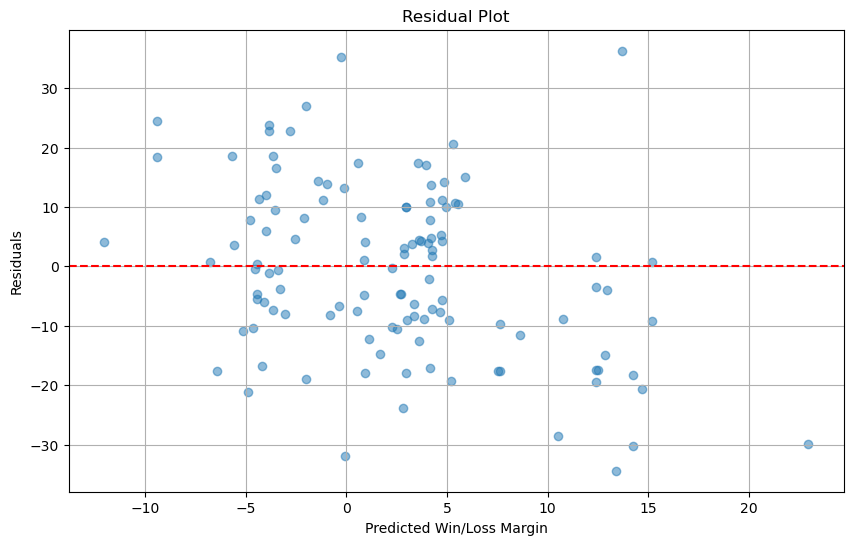

In [162]:
# Creating a residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Win/Loss Margin')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)

Towards the right of the plot, there is skewing in the data especially below the line.

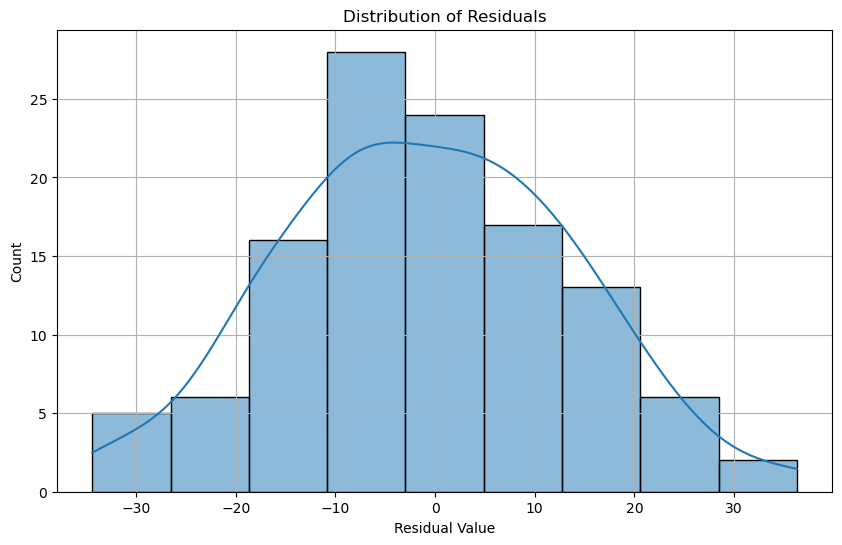

In [163]:
# Distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residual Value')
plt.ylabel('Count')
plt.title('Distribution of Residuals')
plt.grid(True)

Based on the  residual distribution, the model's error are slightly skewed to the right with more kurtosis. The mean is not quite zero. This shows some non-linearity in the data and there might be some outliers in the data skewing the results. A more complex model might be better at navigating the non-linear relationships.


# Next Steps:

The next model should be good at disinguishing complex relationships and be good at dealing with high dimensionality.

I will try a RandomForestRegressor model next.